In [106]:
import h5py
import numpy as np
import pandas as pd
    
h5f=h5py.File('C:/Users/Sandhyash/Downloads/SVHN_single_grey1-DataSet.h5','r')

In [107]:
import tensorflow as tf
#print(tf.__version__)

In [108]:
%matplotlib inline

from tensorflow.keras import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import BatchNormalization,Dense,Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu
from tensorflow.keras.constraints import MaxNorm

import matplotlib.pyplot as plt

In [109]:
X_train=h5f['X_train'][:]
y_train1=h5f['y_train'][:]
X_test=h5f['X_test'][:]
y_test1=h5f['y_test'][:]

h5f.close()

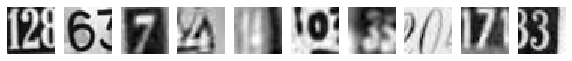

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [112]:
# visualizing the first 10 images in the dataset and their labels

plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train1[0:10]))

In [110]:
print('Train size: ', X_train.shape)
print('Test size: ', X_test.shape)
print('Target train size: ', y_train1.shape)
print('Target test size: ', y_test1.shape)

Train size:  (42000, 32, 32)
Test size:  (18000, 32, 32)
Target train size:  (42000,)
Target test size:  (18000,)


In [111]:
print('Train size: ', X_train.dtype)
print('Test size: ', X_test.dtype)
print('Target train size: ', y_train1.dtype)
print('Target test size: ', y_test1.dtype)

Train size:  float32
Test size:  float32
Target train size:  uint8
Target test size:  uint8


In [8]:
num_classes=10
X_train=X_train.reshape(42000,1024)
X_test=X_test.reshape(18000,1024)
X_train /= 255.0
X_test /=255.0
y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes)
y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes)

print('Train size: ', X_train.shape[0])
print('Test size: ', X_test.shape[0])

Train size:  42000
Test size:  18000


In [9]:
model=Sequential()
model.add(Dense(1024, activation='relu', input_shape=(1024,)))

model.add(Dense(num_classes, activation='softmax'))

for l in model.layers:
    print(l.name, l.input_shape, '===>', l.output_shape)
print()
print(model.summary())

dense (None, 1024) ===> (None, 1024)
dense_1 (None, 1024) ===> (None, 10)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              1049600   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 1,059,850
Trainable params: 1,059,850
Non-trainable params: 0
_________________________________________________________________
None


Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 2s 78us/sample - loss: 2.3026 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.0934
Epoch 2/10
29399/29399 [==============================] - 2s 52us/sample - loss: 2.3024 - accuracy: 0.1010 - val_loss: 2.3028 - val_accuracy: 0.0959
Epoch 3/10
29399/29399 [==============================] - 1s 50us/sample - loss: 2.3023 - accuracy: 0.1028 - val_loss: 2.3028 - val_accuracy: 0.0959
Epoch 4/10
29399/29399 [==============================] - 1s 50us/sample - loss: 2.3023 - accuracy: 0.1033 - val_loss: 2.3028 - val_accuracy: 0.0958
Epoch 5/10
29399/29399 [==============================] - 2s 52us/sample - loss: 2.3022 - accuracy: 0.1044 - val_loss: 2.3028 - val_accuracy: 0.0990
Epoch 6/10
29399/29399 [==============================] - 2s 52us/sample - loss: 2.3021 - accuracy: 0.1071 - val_loss: 2.3027 - val_accuracy: 0.1037
Epoch 7/10
29399/29399 [==============================] 

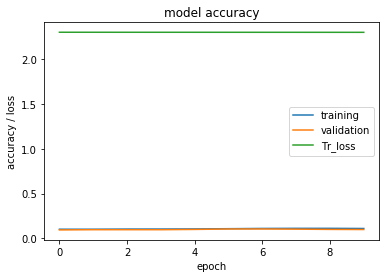

In [10]:
batch_size=20000
epochs=10
#validation_split=.1

model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(X_train, y_train1, batch_size=batch_size,epochs=epochs,validation_split=.3, verbose=True)
loss,accuracy=model.evaluate(X_test,y_test1,verbose=False)
print("model accuracy: ", accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training','validation','Tr_loss'], loc='best')
plt.show()

[0.093405284, 0.095865406, 0.09594477, 0.09578605, 0.0989604, 0.103721924, 0.103880644, 0.10197604, 0.09911912, 0.09777002]
[0.10105786, 0.101023845, 0.102826625, 0.10326882, 0.10439131, 0.1071465, 0.1099017, 0.1110582, 0.1110582, 0.10928943]


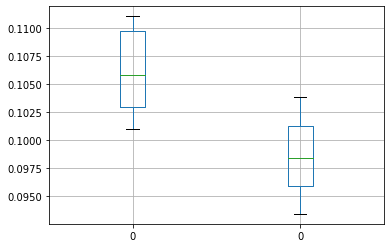

In [11]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta=pd.DataFrame(history.history['accuracy'])
va=pd.DataFrame(history.history['val_accuracy'])

tva= pd.concat([ta,va], axis=1)
tva.boxplot()

Number of hidden layers

In [24]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(1024,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'relu'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=batch_size, epochs=epochs):
    model.summary()
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train1, batch_size=batch_size, epochs=50, validation_split=.1, verbose=False)
    loss,accuracy  = model.evaluate(X_test, y_test1, verbose=False)
    
    print("Model accuracy : ", accuracy)
 
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy / loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation', 'tr_loss'], loc='best')
    plt.show()    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10250     
Total params: 2,109,450
Trainable params: 2,109,450
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.374


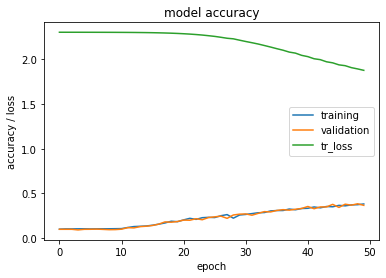

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10250     
Total params: 3,159,050
Trainable params: 3,159,050
Non-trainable params: 0
_________________________________________________________________
Model accuracy :  0.36883333


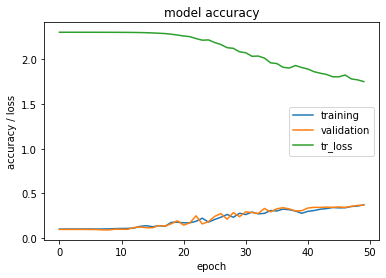

In [25]:
for layers in range(2,4):
    model=create_dense([1024]*layers)
    evaluate(model)

[0.093405284, 0.095865406, 0.09594477, 0.09578605, 0.0989604, 0.103721924, 0.103880644, 0.10197604, 0.09911912, 0.09777002]
[0.10105786, 0.101023845, 0.102826625, 0.10326882, 0.10439131, 0.1071465, 0.1099017, 0.1110582, 0.1110582, 0.10928943]


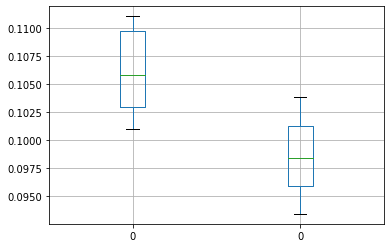

In [26]:
print(history.history['val_accuracy'])
#import pandas as pd
print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

Observations about number of layers

  1. One hidden layer of 512 is sufficient. Adding one more layer is not worth the improvement in accuracy score
  2. Freeze number of hiddden layers to 1

In [28]:
#model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(1024,)))   
model.add(Dense(num_classes, activation='softmax'))             
 
for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_8 (None, 1024) ==> (None, 1024)
dense_9 (None, 1024) ==> (None, 1024)
dense_10 (None, 1024) ==> (None, 1024)
dense_11 (None, 1024) ==> (None, 10)
dense_12 (None, 10) ==> (None, 512)
dense_13 (None, 512) ==> (None, 10)
dense_14 (None, 10) ==> (None, 512)
dense_15 (None, 512) ==> (None, 10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                10250     
_________________________________________________________________
dense_12 (Dense)     

model accuracy : 0.16544445


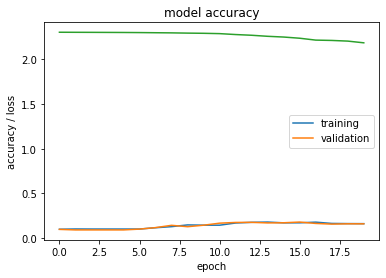

In [29]:
batch_size = 30000
epochs = 20

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train1, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
loss,accuracy  = model.evaluate(X_test, y_test1, verbose=False)
print("model accuracy :" , accuracy)
#print("validation accuracy : ", val_accuracy)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy / loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

[0.09785714, 0.09190476, 0.09190476, 0.09190476, 0.09190476, 0.10095238, 0.117619045, 0.14333333, 0.12785715, 0.14452381, 0.16738096, 0.1754762, 0.17642857, 0.17023809, 0.17190476, 0.1797619, 0.16428572, 0.15690476, 0.1602381, 0.16]
[0.099391535, 0.102380954, 0.10174603, 0.10174603, 0.10174603, 0.10174603, 0.11626984, 0.12830688, 0.1478307, 0.1449471, 0.14462963, 0.1692328, 0.17674603, 0.17973545, 0.1711111, 0.17142858, 0.17878307, 0.16444445, 0.16272487, 0.16198413]


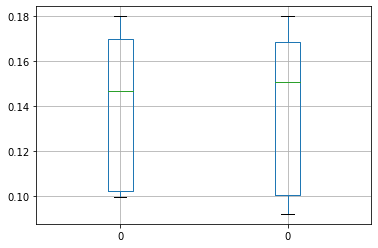

In [30]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

With 512 neurons and one hidden layer

    1. Reducing neurons from 1024 to 512 has brought down the score significantly

    2. With 128 neruons the validation accuracy drops to 97% rounded and the degree of overfit reduces further

    3. Futher reduction of neurons degrades the peformance both in training and validation

Impact of batch size

In [31]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(1024,)))   
model.add(Dense(num_classes, activation='softmax'))              
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_16 (None, 1024) ==> (None, 256)
dense_17 (None, 256) ==> (None, 10)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
Total params: 264,970
Trainable params: 264,970
Non-trainable params: 0
_________________________________________________________________
None


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 1s 34us/sample - loss: 2.2951 - accuracy: 0.1702 - val_loss: 2.2931 - val_accuracy: 0.1853
Epoch 2/20
42000/42000 [==============================] - 1s 21us/sample - loss: 2.2901 - accuracy: 0.2004 - val_loss: 2.2864 - val_accuracy: 0.2518
Epoch 3/20
42000/42000 [==============================] - 1s 21us/sample - loss: 2.2823 - accuracy: 0.2416 - val_loss: 2.2774 - val_accuracy: 0.2283
Epoch 4/20
42000/42000 [==============================] - 1s 20us/sample - loss: 2.2716 - accuracy: 0.2526 - val_loss: 2.2649 - val_accuracy: 0.2644
Epoch 5/20
42000/42000 [==============================] - 1s 20us/sample - loss: 2.2578 - accuracy: 0.2796 - val_loss: 2.2486 - val_accuracy: 0.3219
Epoch 6/20
42000/42000 [==============================] - 1s 20us/sample - loss: 2.2406 - accuracy: 0.3083 - val_loss: 2.2304 - val_accuracy: 0.2880
Epoch 7/20
42000/42000 [==============================] 

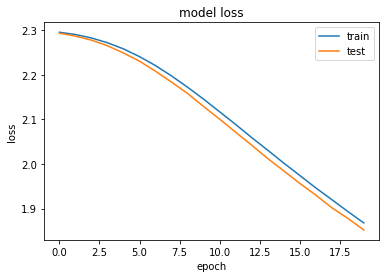

In [38]:
batch_size = 1000
epochs = 20
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1 )
    
history = model.fit(X_train, y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    validation_data=(x_test, y_test))
                    validation_data=(X_test, y_test1), callbacks = [es])

score = model.evaluate(X_test, y_test1, verbose=False)

print()
print ('Test loss:', round(score[0], 5))
print ('Test accuracy:', round(score[1], 5))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

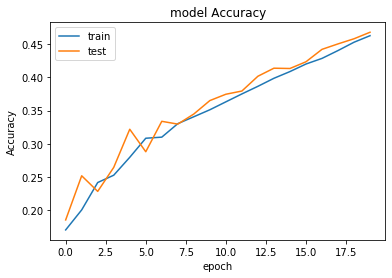

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


[0.18527777, 0.25177777, 0.22827777, 0.2643889, 0.3218889, 0.288, 0.33383334, 0.32961112, 0.34483334, 0.36505556, 0.3746111, 0.37944445, 0.40172222, 0.41383332, 0.41338888, 0.4235, 0.4422222, 0.45044443, 0.45816666, 0.468]
[0.17023809, 0.20038095, 0.24161905, 0.25264287, 0.27959523, 0.30833334, 0.3099762, 0.3303095, 0.34071428, 0.3512143, 0.36316666, 0.37507144, 0.38654763, 0.39864287, 0.4087381, 0.42011905, 0.42859524, 0.44042858, 0.45295238, 0.46280953]


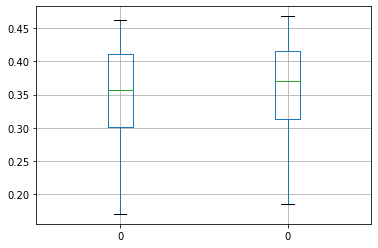

In [40]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)
 
tva.boxplot()

Increase the Epochs

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(1024,)))   
model.add(Dense(num_classes, activation='softmax'))              
        
        

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)
print()
print (model.summary())


dense_18 (None, 1024) ==> (None, 128)
dense_19 (None, 128) ==> (None, 10)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               131200    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
batch_size = 1000    
epochs = 100
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping( monitor='val_loss', mode='min', min_delta = 0.01, verbose=1 )
    
history = model.fit(X_train, y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
#                    validation_data=(x_test, y_test))
                    validation_data=(X_test, y_test1), callbacks = [es])

score = model.evaluate(X_test, y_test1, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))

Train on 42000 samples, validate on 18000 samples
Epoch 1/100
42000/42000 [==============================] - 1s 22us/sample - loss: 2.3013 - accuracy: 0.1297 - val_loss: 2.3008 - val_accuracy: 0.1186
Epoch 2/100
42000/42000 [==============================] - 1s 14us/sample - loss: 2.2999 - accuracy: 0.1292 - val_loss: 2.2993 - val_accuracy: 0.1348
Epoch 00002: early stopping

Test loss: 2.299
Test accuracy: 0.135


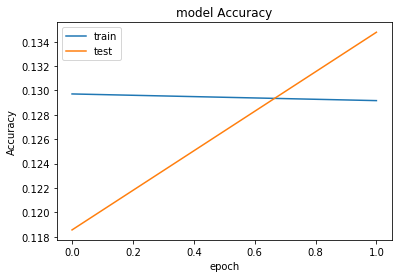

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

[0.11855555, 0.13477778]
[0.12971428, 0.12916666]


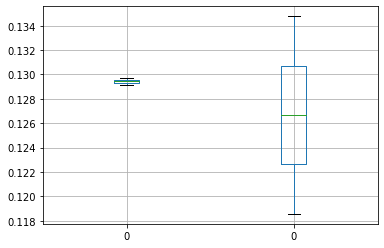

In [48]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

Observations on Epochs

    Without early stopping, epochs leads to clear overfitting
    Increasing Epochs is not useful. The Model becomes severly overfit
    With smaller batch size, looks like it is a case of curse of dimensionality....
    large batch size of 1000 the model stabilizes, avoids overfitting but the score is marginally increased in validation.



Overall observation on layers, number of neurons, batch size and epoch

    Keep the model simple in terms of number of layers and number of neurons. This will reduce time to train, less computation needs

    Keep batch size on the larger side. It stabilizes the mode and gives more reliable estimates. If the entire data and fit in then do not use batch size

    Too many epochs is not helpful. It leads to waste of time and resources and overfit models Constrain epochs using early stopping.

    use more epochs if the batch size is large. With smaller batch size, the model tends to overfit in first few epochs... the situation become worse with more epochs



Activation function selection

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 1s 43us/sample - loss: 2.3145 - accuracy: 0.0997 - val_loss: 2.3080 - val_accuracy: 0.0965
Epoch 2/20
33600/33600 [==============================] - 1s 31us/sample - loss: 2.3058 - accuracy: 0.1012 - val_loss: 2.3106 - val_accuracy: 0.0974
Epoch 3/20
33600/33600 [==============================] - 1s 34us/sample - loss: 2.3060 - accuracy: 0.1007 - val_loss: 2.3063 - val_accuracy: 0.0969
Epoch 4/20
33600/33600 [==============================] - 1s 33us/sample - loss: 2.3058 - accuracy: 0.1012 - val_loss: 2.3118 - val_accuracy: 0.1014
Epoch 5/20
33600/33600 [==============================] - 1s 34us/sample - loss: 2.3070 - accuracy: 0.1046 - val_loss: 2.3050 - val_accuracy: 0.0967
Epoch 6/20
33600/33600 [==============================] - 1s 34us/sample - loss: 2.3046 - accuracy: 0.1031 - val_loss: 2.3068 - val_accuracy: 0.0974
Epoch 7/20
33600/33600 [==============================] -

33600/33600 [==============================] - 1s 33us/sample - loss: 2.2198 - accuracy: 0.2926 - val_loss: 2.2162 - val_accuracy: 0.2848
Epoch 15/20
33600/33600 [==============================] - 1s 34us/sample - loss: 2.2044 - accuracy: 0.2988 - val_loss: 2.1994 - val_accuracy: 0.2968
Epoch 16/20
33600/33600 [==============================] - 1s 35us/sample - loss: 2.1883 - accuracy: 0.3072 - val_loss: 2.1838 - val_accuracy: 0.2976
Epoch 17/20
33600/33600 [==============================] - 1s 33us/sample - loss: 2.1711 - accuracy: 0.3137 - val_loss: 2.1652 - val_accuracy: 0.3263
Epoch 18/20
33600/33600 [==============================] - 1s 35us/sample - loss: 2.1532 - accuracy: 0.3305 - val_loss: 2.1476 - val_accuracy: 0.3382
Epoch 19/20
33600/33600 [==============================] - 1s 36us/sample - loss: 2.1354 - accuracy: 0.3397 - val_loss: 2.1296 - val_accuracy: 0.3452
Epoch 20/20
33600/33600 [==============================] - 1s 36us/sample - loss: 2.1170 - accuracy: 0.3482 - va

ValueError: Unknown activation function:swish

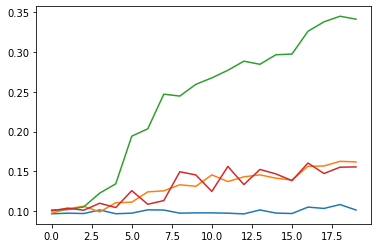

In [49]:
batch_size = 1000
epochs = 20

#lr = tf.keras.layers.LeakyReLU


for activation in ['sigmoid', 'tanh', 'relu', 'elu', 'swish']:
    model = Sequential()
    model.add(Dense(512, activation=activation, input_shape=(1024,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
 

    history = model.fit(X_train, y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,validation_split=.2)

    test_loss, test_accuracy  = model.evaluate(X_test, y_test1, verbose=False)
    
    print()
    print(f'Test loss: {test_loss:.3}')
    print(f'Test accuracy: {test_accuracy:.3}')
    
    plt.plot(history.history['val_accuracy'])

    
    
    
    
    
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['sigmoid', 'tanh', 'relu' ,'elu', 'swish'], loc='lower right')

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 1s 30us/sample - loss: 2.3311 - accuracy: 0.0976 - val_loss: 2.3080 - val_accuracy: 0.0965
Epoch 2/20
33600/33600 [==============================] - 1s 19us/sample - loss: 2.3049 - accuracy: 0.0990 - val_loss: 2.3064 - val_accuracy: 0.1010
Epoch 3/20
33600/33600 [==============================] - 1s 19us/sample - loss: 2.3041 - accuracy: 0.1010 - val_loss: 2.3056 - val_accuracy: 0.0969
Epoch 4/20
33600/33600 [==============================] - 1s 20us/sample - loss: 2.3038 - accuracy: 0.1014 - val_loss: 2.3037 - val_accuracy: 0.1014
Epoch 5/20
33600/33600 [==============================] - 1s 19us/sample - loss: 2.3043 - accuracy: 0.1016 - val_loss: 2.3060 - val_accuracy: 0.1014
Epoch 6/20
33600/33600 [==============================] - 1s 20us/sample - loss: 2.3048 - accuracy: 0.1032 - val_loss: 2.3072 - val_accuracy: 0.0968
Epoch 7/20
33600/33600 [==============================] -

33600/33600 [==============================] - 1s 21us/sample - loss: 2.2373 - accuracy: 0.2085 - val_loss: 2.2351 - val_accuracy: 0.2065
Epoch 15/20
33600/33600 [==============================] - 1s 20us/sample - loss: 2.2264 - accuracy: 0.2138 - val_loss: 2.2239 - val_accuracy: 0.2152
Epoch 16/20
33600/33600 [==============================] - 1s 21us/sample - loss: 2.2151 - accuracy: 0.2222 - val_loss: 2.2141 - val_accuracy: 0.2086
Epoch 17/20
33600/33600 [==============================] - 1s 21us/sample - loss: 2.2032 - accuracy: 0.2268 - val_loss: 2.2014 - val_accuracy: 0.2276
Epoch 18/20
33600/33600 [==============================] - 1s 21us/sample - loss: 2.1913 - accuracy: 0.2333 - val_loss: 2.1896 - val_accuracy: 0.2343
Epoch 19/20
33600/33600 [==============================] - 1s 22us/sample - loss: 2.1793 - accuracy: 0.2432 - val_loss: 2.1774 - val_accuracy: 0.2369
Epoch 20/20
33600/33600 [==============================] - 1s 21us/sample - loss: 2.1668 - accuracy: 0.2505 - va

C:\Users\Sandhyash\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


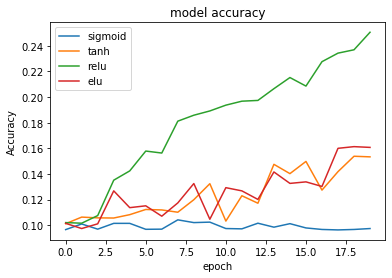

In [54]:
batch_size = 1000
epochs = 20

#lr = tf.keras.layers.LeakyReLU


for activation in ['sigmoid', 'tanh', 'relu', 'elu']:
    model = Sequential()
    model.add(Dense(256, activation=activation, input_shape=(1024,)))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
 

    history = model.fit(X_train, y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,validation_split=.2)

    test_loss, test_accuracy  = model.evaluate(X_test, y_test1, verbose=False)
    
    print()
    print(f'Test loss: {test_loss:.3}')
    print(f'Test accuracy: {test_accuracy:.3}')
    
    plt.plot(history.history['val_accuracy'])

    
    
    
    
    
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['sigmoid', 'tanh', 'relu' ,'elu', 'swish'], loc='Upper left')

Observations about choice of activation functions

Sigmoid is the slowest and sluggish. Relu gives the higest score and all others are peforming better than Sigmoid.


Learning Rate Optimization

In [55]:
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(1024,)))
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [56]:

def run_model(model, lrr):
    batch_size = 1000   
    epochs = 20
    model.summary()
    opt = tf.keras.optimizers.Adam(learning_rate=lrr) 
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train1, batch_size=batch_size, epochs=epochs, validation_split=.2, verbose=False)
    loss, accuracy  = model.evaluate(X_test, y_test1, verbose=False)
    print("learning rate" , lr)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()







    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_59 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
learning rate 0.001


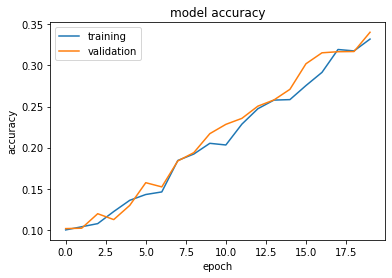


Test loss: 2.11
Test accuracy: 0.343
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_61 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
learning rate 0.002


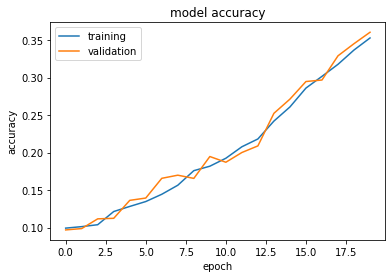


Test loss: 2.03
Test accuracy: 0.361
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_63 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
learning rate 0.003


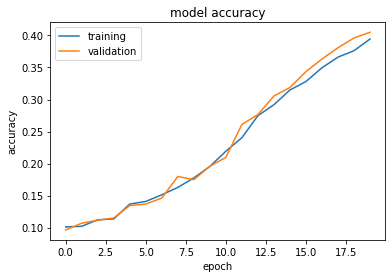


Test loss: 1.93
Test accuracy: 0.403
Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_65 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
learning rate 0.004


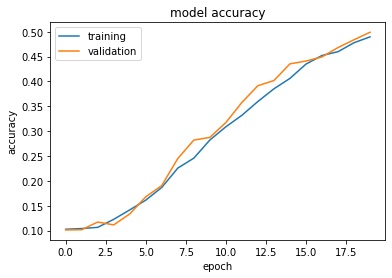


Test loss: 1.71
Test accuracy: 0.502
Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_67 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
learning rate 0.005


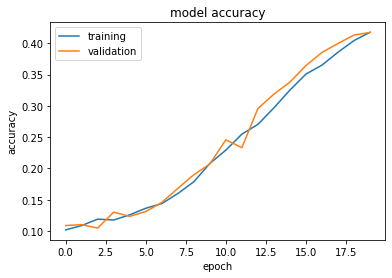


Test loss: 1.86
Test accuracy: 0.416
Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_69 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
learning rate 0.006


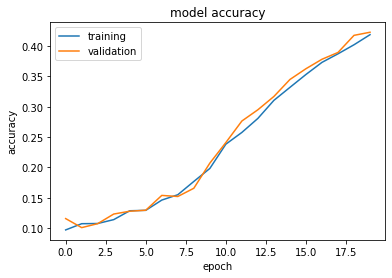


Test loss: 1.8
Test accuracy: 0.421
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_71 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
learning rate 0.007


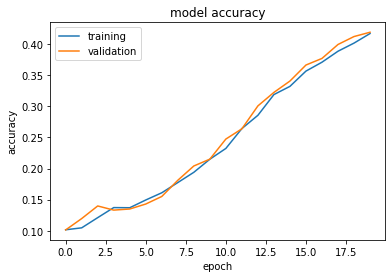


Test loss: 1.79
Test accuracy: 0.416
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_73 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
learning rate 0.008


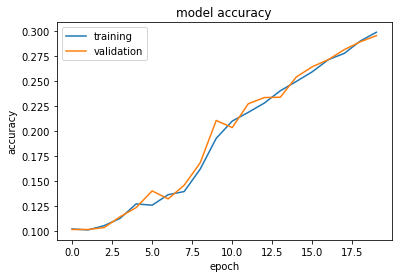


Test loss: 1.96
Test accuracy: 0.303
Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_75 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________
learning rate 0.009000000000000001


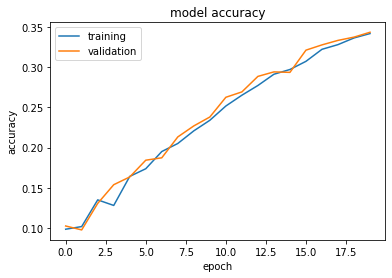


Test loss: 1.87
Test accuracy: 0.344


In [57]:
import numpy as np

for lr in np.arange(0.001, 0.01 , 0.001):    # try lr of 0.005 to 0.01 in steps of 0.001
    model = create_model()
    run_model(model , lr)

Observations about choice of learning rate

    Too small learning rates such as 0.00001 requires large number of epochs to learn. Both training and testing scores are low
    Larger learning rates 0.05 for e.g. lead to unstable model in validation data and overall poor scores in training and test
    Learning rates of 0.005 give more stable results early in the epoch. Becomes overfit with more epochs



Gradient Descent Optimizers

In [58]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(1024,)))
    model.add(Dense(num_classes, activation='softmax'))  

    return model

In [61]:
from tensorflow.keras import optimizers

def run_model(model):
    batch_size = 1000    # keep in 2^x 
    epochs = 20
    model.summary()
    opt = optimizers.SGD(lr=0.004)
    #opt = tf.keras.optimizers.Adam(lr=0.005, decay=1e-6)
    # opt = tf.keras.optimizers.RMSprop(lr=0.005, decay=1e-6)


  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train1, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(X_test, y_test1, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_79 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________


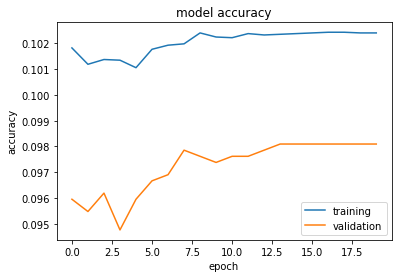


Test loss: 2.3
Test accuracy: 0.0954


In [62]:
model = create_model()
run_model(model)

Dropout based regularization

In [63]:
#from keras.constraints import max_norm
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

def create_model():
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(1024,),kernel_constraint = MaxNorm(2)))
    model.add(Dropout(0.3) ) 
    #model.add(Dense(64, activation='relu', kernel_constraint = MaxNorm(2)))
    #model.add(Dropout(0.1) )  # 20% drop out for the first hidden layer   ----- > drop out
    model.add(Dense(num_classes, activation='softmax'))  

    return model



In [66]:
#from keras import optimizers

def run_model(model):
    batch_size = 1000   
    epochs = 20
    model.summary()
    opt = tf.keras.optimizers.Adam(lr=0.003 , decay=1e-6 )

  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train1, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(X_test, y_test1, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')


Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_83 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________


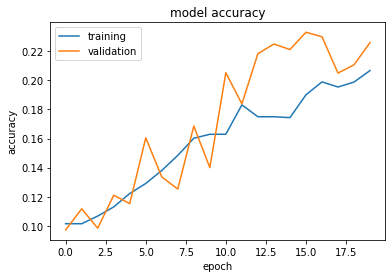


Test loss: 2.27
Test accuracy: 0.23


In [67]:
model = create_model()
run_model(model)

Batch Normalization

In [71]:
from tensorflow.keras.layers import Activation

In [72]:
def create_model():
    model = Sequential( )
    model.add(Dense(512, input_shape=(1024,)))
    model.add(BatchNormalization())
    model.add(Activation('sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))  

    return model

In [75]:
def run_model(model):
    batch_size = 1000
    epochs = 20
    model.summary()
    opt = optimizers.Adam(lr=0.005)
  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train1, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(X_test, y_test1, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 10)                5130      
Total params: 531,978
Trainable params: 530,954
Non-trainable params: 1,024
_________________________________________________________________


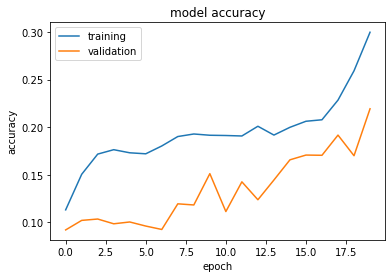


Test loss: 2.17
Test accuracy: 0.22


In [76]:
model = create_model()
run_model(model)

Weight Initialization

In [77]:
#from keras.initializers import he_normal


def create_model(wt_init):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(1024,), kernel_initializer = wt_init ))
    model.add(Dropout(0.2))  # drop out for the first hidden layer   ----- > drop out
    model.add(Dense(num_classes, activation='softmax'))  

    return model


In [78]:
def run_model(model):
    batch_size = 1000    
    epochs = 20
    model.summary()
    opt = tf.keras.optimizers.Adam(lr=0.006, decay=1e-6)
  
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train1, batch_size=batch_size, epochs=epochs, validation_split=.2, verbose=False)
    test_loss, test_accuracy  = model.evaluate(X_test, y_test1, verbose=False)
  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {test_loss:.3}')
    print(f'Test accuracy: {test_accuracy:.3}')


Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 10)                5130      
Total params: 529,930
Trainable params: 529,930
Non-trainable params: 0
_________________________________________________________________


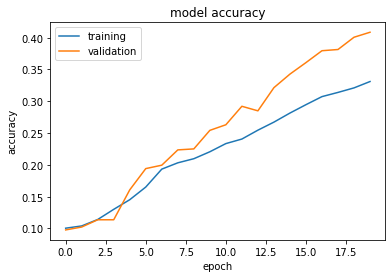


Test loss: 1.88
Test accuracy: 0.403


In [79]:
wt_init = tf.keras.initializers.he_normal(seed=None)
#wt_init = tf.keras.initializers.lecun_uniform(seed=None)
#wt_init = tf.keras.initializers.glorot_normal(seed=None)

model = create_model(wt_init)
run_model(model)

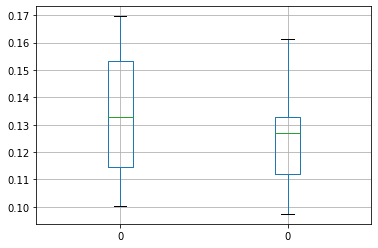

In [80]:
import pandas as pd

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

Grid Search

In [81]:
import numpy as np
from tensorflow.keras import utils
from tensorflow.keras.models import load_model

random_seed = 64
np.random.seed(random_seed)

from tensorflow.keras.constraints import MaxNorm
#from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.datasets import mnist
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.optimizers import RMSprop
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.activations import relu
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
#from sklearn.model_selection import GridSearchCV, cross_val_score

#import matplotlib.pyplot as plt

In [85]:
#(x_train, y_train), (x_test, y_test) = mnist.load_data()

num_classes = 10
X_train = X_train.reshape(42000, 1024)    # 1024 = 32 X 32 the size of each image. There are 42000 images for training
X_test = X_test.reshape(18000, 1024)      # Images are flattended out into a vector of 1024 elements
X_train = tf.keras.backend.cast_to_floatx(X_train)      # Change the data type to float from integer (0 - 255)
X_test = tf.keras.backend.cast_to_floatx(X_test)
X_train /= 255.0                           # Scale the data between 0 and 1
X_test /= 255.0

original_y_train = y_train1
original_y_test = y_test1

y_train1 = tf.keras.utils.to_categorical(y_train1, num_classes)   # Converting the target into categorical which is stored as numeric
y_test1 = tf.keras.utils.to_categorical(y_test1, num_classes)     # Keras converst these into 1-hot coded vectors as these are lables


print ('Train size:', X_train.shape[0])
print ('Test size:', X_test.shape[0])

Train size: 42000
Test size: 18000


In [86]:
# Function to create model, required for KerasClassifier
def create_model(number_of_layers=1, neurons_per_layer = 32, dropout_percent = 0.2, optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(neurons_per_layer, activation='relu', input_shape=(1024,)))
    
    for i in range(number_of_layers-1):
        model.add(Dense(neurons_per_layer, activation='relu', kernel_constraint = MaxNorm(3)))
        model.add(Dropout(dropout_percent))
        
    # Add the output layer with softmax
    model.add(Dense(num_classes, kernel_initializer = 'normal', activation='softmax'))  
        
    
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
   
    return model

In [87]:
# create model
kc_model = KerasClassifier(build_fn=create_model,number_of_layers=1, neurons_per_layer = 512, optimizer = 'adam', epochs=20, batch_size=24000, verbose=0) # Wrapper for scikitlearn API, provides 
                                                                                    # facility to get scores 

In [88]:
kfold = StratifiedKFold(n_splits = 2, shuffle=True, random_state = 64)    # kept the n_splits = 2 for demo.... this is the K value 

In [102]:
#results = cross_val_score(kc_model, X_train, original_y_train, cv=kfold, verbose=1)

In [103]:
#print('results = {}\nresults.mean = {}'.format(results, results.mean()))

In [91]:
# define the grid search parameters

param_grid = dict(number_of_layers = [1,2],
                 neurons_per_layer = [32 , 128],
                 optimizer = ['adam', 'sgd'])


In [101]:
gridsearcher = GridSearchCV(estimator=kc_model, param_grid=param_grid, n_jobs=1)
grid_result = gridsearcher.fit(X_train, original_y_train)

C:\Users\Sandhyash\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [93]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.099810 using {'neurons_per_layer': 32, 'number_of_layers': 2, 'optimizer': 'adam'}
0.097738 (0.001852) with: {'neurons_per_layer': 32, 'number_of_layers': 1, 'optimizer': 'adam'}
0.097738 (0.001852) with: {'neurons_per_layer': 32, 'number_of_layers': 1, 'optimizer': 'sgd'}
0.099810 (0.002566) with: {'neurons_per_layer': 32, 'number_of_layers': 2, 'optimizer': 'adam'}
0.097738 (0.001852) with: {'neurons_per_layer': 32, 'number_of_layers': 2, 'optimizer': 'sgd'}
0.097738 (0.001852) with: {'neurons_per_layer': 128, 'number_of_layers': 1, 'optimizer': 'adam'}
0.099810 (0.002566) with: {'neurons_per_layer': 128, 'number_of_layers': 1, 'optimizer': 'sgd'}
0.097738 (0.001852) with: {'neurons_per_layer': 128, 'number_of_layers': 2, 'optimizer': 'adam'}
0.099810 (0.002566) with: {'neurons_per_layer': 128, 'number_of_layers': 2, 'optimizer': 'sgd'}
